# Performing GMM
Now that we have our dataset, we can now perform GMM to cluster stocks based on the technical indicators.

In [54]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [55]:
import sys
import os

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [56]:
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook


We will first perform GMM on each stock individually based on its technical indicators, with the covariance type as full

Clustering stocks using GMM
         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  61.276626  57.216064    0.024489  1.346125e+06  2.257680  0.992430   
1  57.045113  54.503355    0.020058  7.345173e+05  1.942831  0.997638   
2  45.008107  46.681704    0.025837 -6.667620e+05  2.533673  1.004533   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.972458  0.910425  0.415155  -25.803432  0.016083  0.018900  0.057212   
1  0.986373  0.946356  0.099535  -36.504749  0.009433  0.007338  0.030785   
2  1.019059  0.997617  0.463151  -64.367726 -0.008590 -0.010222 -0.027293   

    ROC_100  clusterCoverage  
0  0.206125         0.337928  
1  0.130672         0.477186  
2  0.061771         0.184886  


<IPython.core.display.Javascript object>


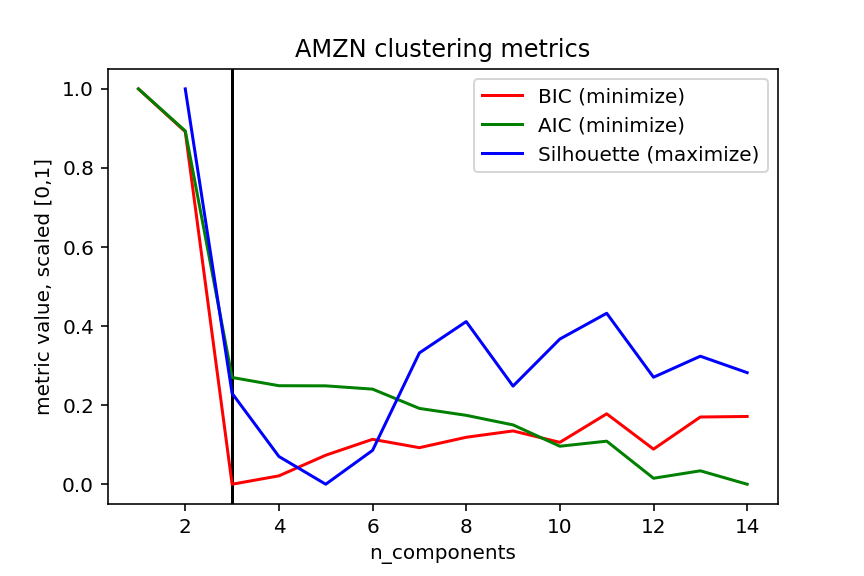

<IPython.core.display.Javascript object>


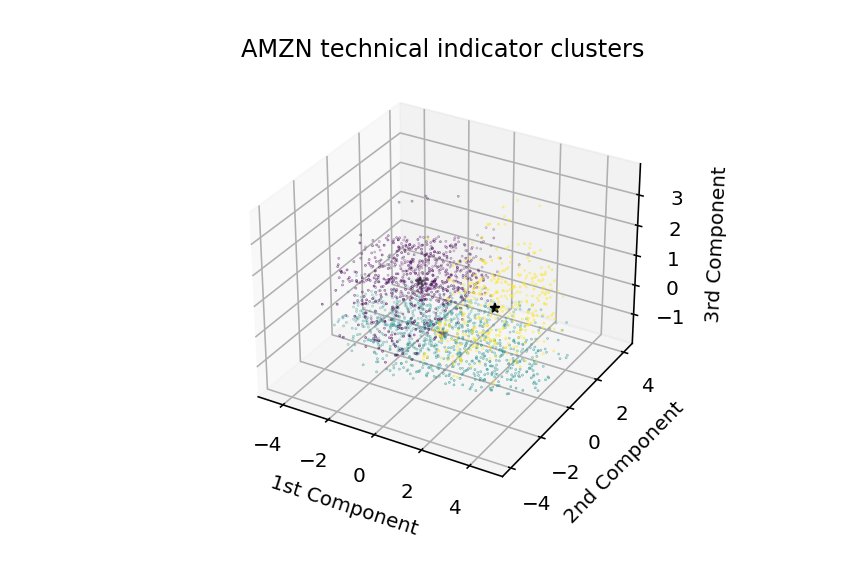

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  45.207789  47.246465    0.041631 -2.310291e+06  4.048452  1.009877   
1  61.628235  57.026728    0.040349  1.244549e+07  3.787096  0.985946   
2  54.620368  48.866785    0.044065 -5.290914e+06  4.083494  0.992025   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.032635  1.025600  0.084266  -62.511615 -0.013781 -0.020427 -0.042592   
1  0.948446  0.877384  0.081021  -24.950202  0.027199  0.037749  0.110454   
2  0.977946  0.971714  0.668128  -44.586447  0.011055  0.019074  0.050565   

    ROC_100  clusterCoverage  
0  0.086466         0.435848  
1  0.388750         0.444017  
2  0.045771         0.120135  


<IPython.core.display.Javascript object>


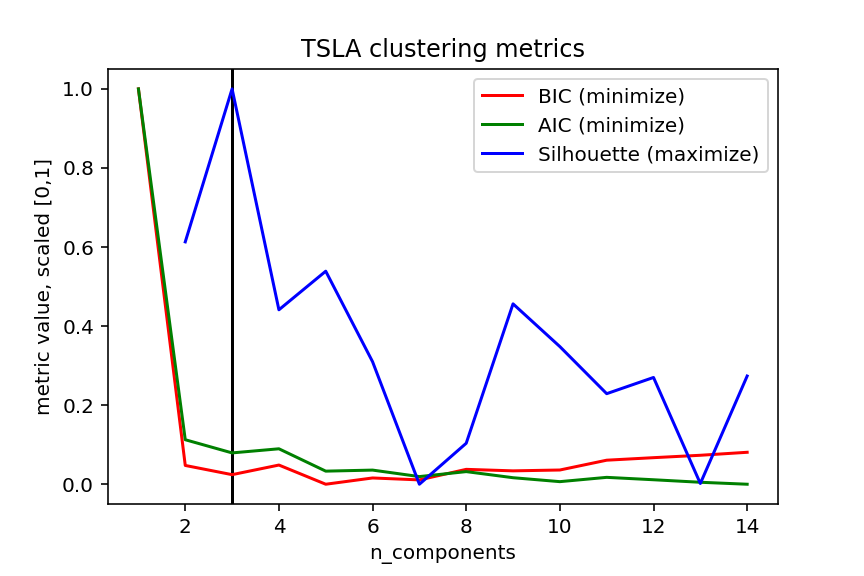

<IPython.core.display.Javascript object>


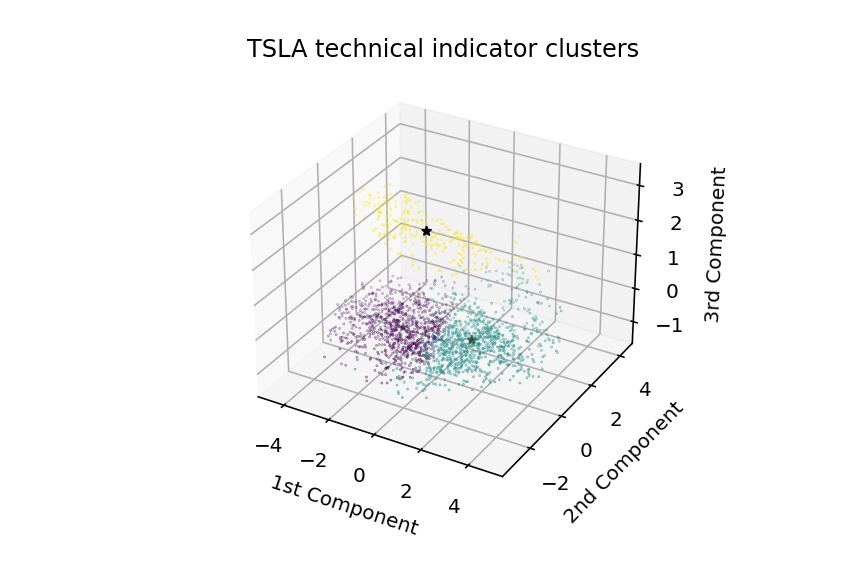

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  40.497934  41.866313    0.028538 -7.343423e+06  2.851599  1.013686   
1  63.004603  58.162660    0.027605  7.765993e+06  2.510131  0.992624   
2  48.186734  51.862411    0.039731  1.606250e+06  3.426108  0.990223   
3  49.815824  48.351673    0.029934 -6.036233e+05  2.723407  1.009790   
4  58.221718  53.634018    0.019422  2.029664e+06  2.293364  0.992204   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.037123  1.063763  0.834456  -74.851257 -0.014412 -0.029043 -0.053025   
1  0.963345  0.887127  0.412144  -22.620202  0.025298  0.019709  0.080495   
2  0.999954  1.067402  0.394136  -41.214194 -0.020638  0.021345 -0.026476   
3  1.011495  0.957235  0.369423  -57.839010  0.006140 -0.018630  0.004122   
4  0.972303  0.976807  1.274540  -29.130971  0.014908  0.018967  0.055012   

    ROC_100  clusterCoverage  
0 -0.049414         0.186813  
1  0.227915         0.285714  
2 -0.

<IPython.core.display.Javascript object>


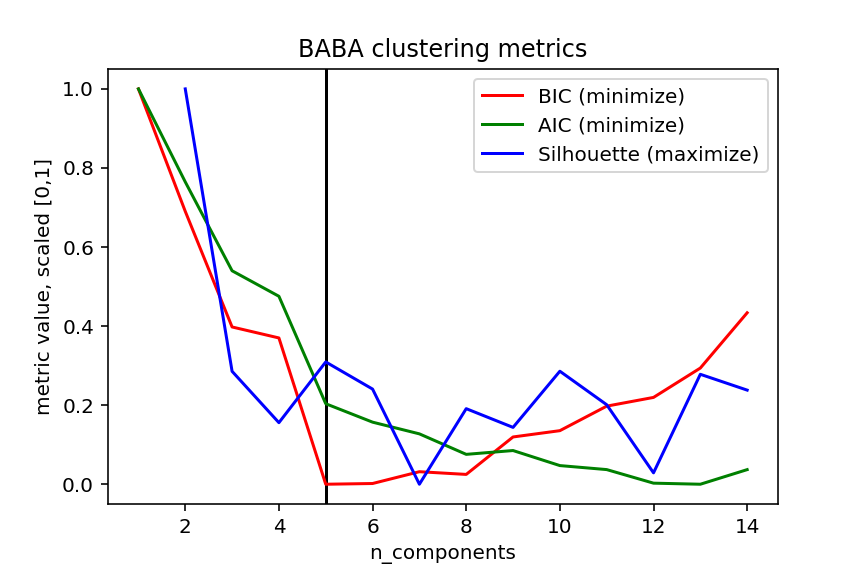

<IPython.core.display.Javascript object>


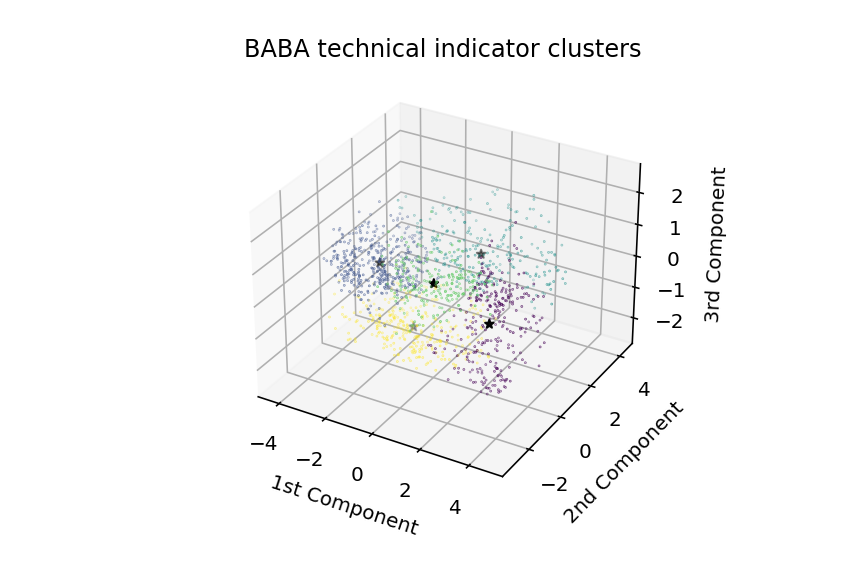

         RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  47.148937  1.366143    0.017561 -1.930093e+08   9.723719  1.004232   
1  63.602418  5.963205    0.018261 -1.835093e+08   8.928943  0.991557   
2  56.882609 -0.270167    0.015525 -5.300296e+08  18.908178  0.998439   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.010761  0.986982  0.247859 -204.237168 -0.002935 -0.008881 -0.013308   
1  0.973534  0.934708  0.230060 -133.599350  0.013026  0.019931  0.048664   
2  0.990432  0.949478  0.514956 -324.183269  0.008083  0.004701  0.023975   

    ROC_100  clusterCoverage  
0  0.063671         0.277069  
1  0.122451         0.333333  
2  0.116136         0.389598  


<IPython.core.display.Javascript object>


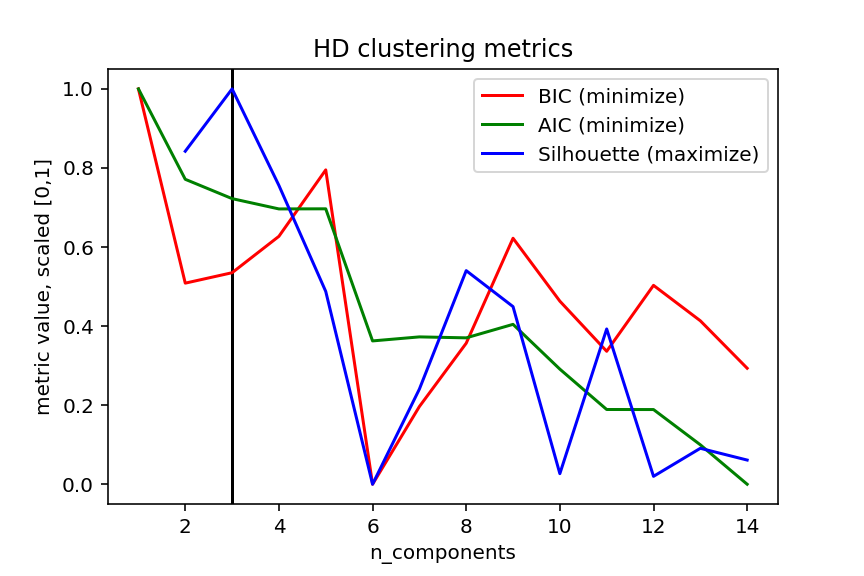

<IPython.core.display.Javascript object>


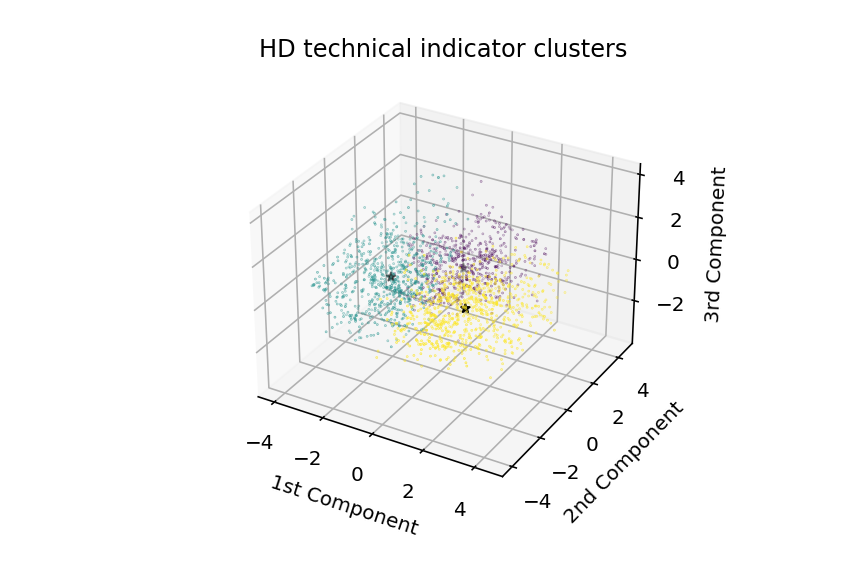

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  47.172721  21.361999    0.019798 -1.083849e+07  4.916291  0.995573   
1  62.877789  54.996592    0.016078  6.267681e+04  1.142834  0.991031   
2  52.843848   2.971352    0.017155 -2.165218e+07  8.321927  0.999429   
3  50.124995  47.010486    0.016288  5.156784e+05  1.130016  1.001959   

     SMA_20   SMA_100       SAR  Williams%R       APO    ROC_5    ROC_20  \
0  1.003918  1.029635  0.550417 -112.571678 -0.010663  0.00783 -0.019471   
1  0.974523  0.949314  0.451062  -12.805311  0.009915  0.02083  0.041311   
2  0.995062  0.975640  0.579590 -175.281195  0.004683  0.00186  0.014013   
3  1.002832  0.993232  0.461317  -50.608959  0.000680 -0.00358  0.000028   

    ROC_100  clusterCoverage  
0 -0.037929         0.102976  
1  0.082473         0.088333  
2  0.065859         0.323571  
3  0.028406         0.485120  


<IPython.core.display.Javascript object>


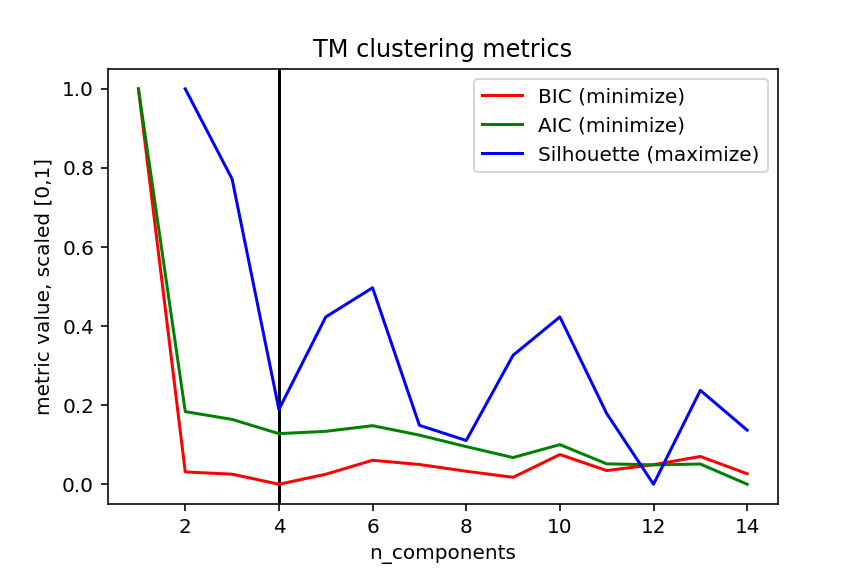

<IPython.core.display.Javascript object>


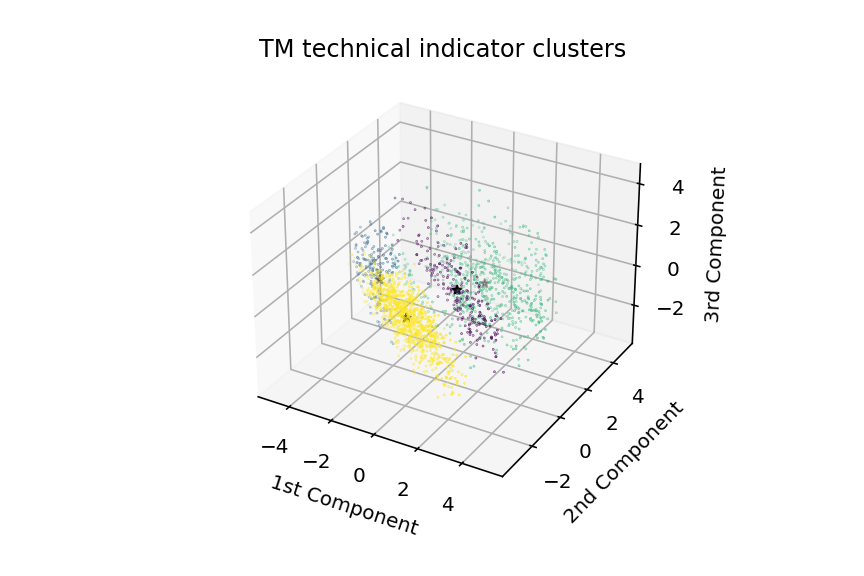

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  58.877032   0.024403    0.016628 -2.898808e+08  9.129645  0.997420   
1  61.024233  14.586429    0.021383 -9.572463e+07  4.199929  0.992175   
2  44.299490   4.070312    0.021061 -1.594733e+08  5.676585  1.004744   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.983938  0.938840  0.660587 -165.716444  0.012652  0.007708  0.038111   
1  0.976083  0.935363  0.271009  -61.800217  0.011654  0.018546  0.043849   
2  1.016572  1.006720  0.378572 -129.545228 -0.007585 -0.010860 -0.025631   

    ROC_100  clusterCoverage  
0  0.127798         0.347189  
1  0.128957         0.316486  
2  0.034464         0.336325  


<IPython.core.display.Javascript object>


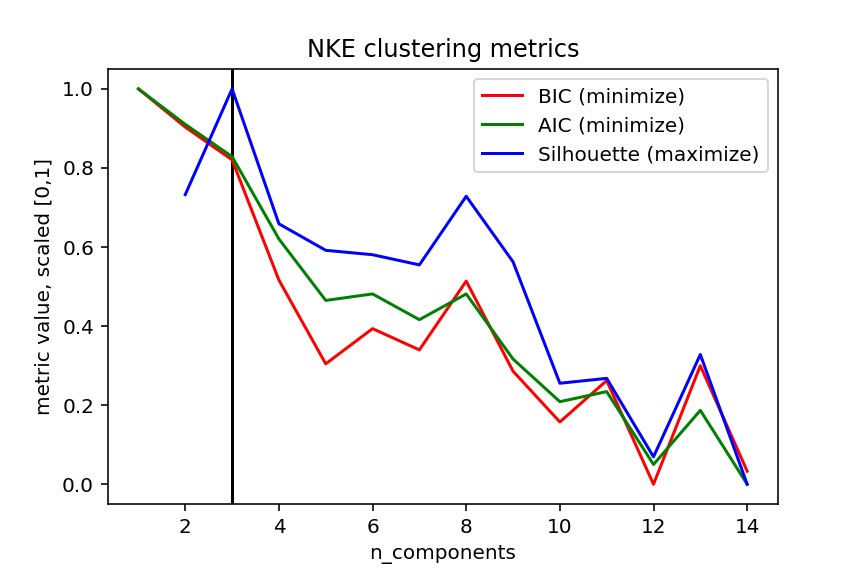

<IPython.core.display.Javascript object>


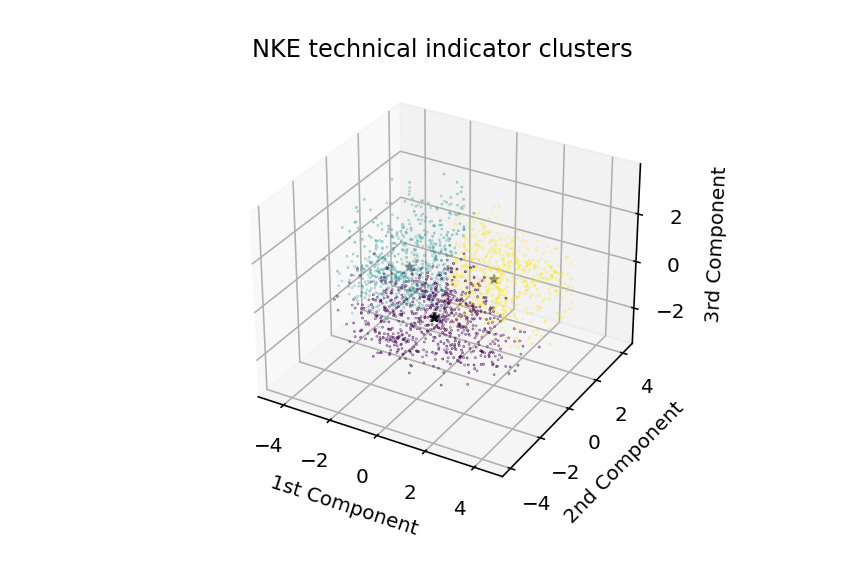

          RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0   71.315094  4.411218    0.012030 -3.365598e+08  13.202963  0.990827   
1   51.347084 -1.732413    0.011604 -8.958240e+08  29.766507  0.998908   
2   48.615382  2.193658    0.015509 -1.960850e+08   9.081605  0.998847   
3   53.212896  0.363710    0.013006 -6.806820e+08  23.332989  0.995084   
4   53.387478 -0.086583    0.012416 -6.050039e+08  21.220979  0.999987   
5   51.609723  4.026536    0.016474 -8.943299e+07   5.820685  0.993425   
6   41.295153 -2.702475    0.013080 -7.665549e+08  26.012223  1.004522   
7   61.432910  0.218837    0.010851 -7.915636e+08  26.677405  0.995406   
8   61.424688  4.839633    0.014621  2.527934e+07   2.579101  0.996312   
9   61.251558  2.237230    0.012413 -3.205512e+08  12.865309  0.999359   
10  62.222784  4.134848    0.013841 -1.008429e+08   6.312131  0.996421   
11  46.861814 -0.448216    0.013346 -2.576643e+08  11.176168  1.010537   
12  44.039754  0.418528    0.015128 -4

<IPython.core.display.Javascript object>


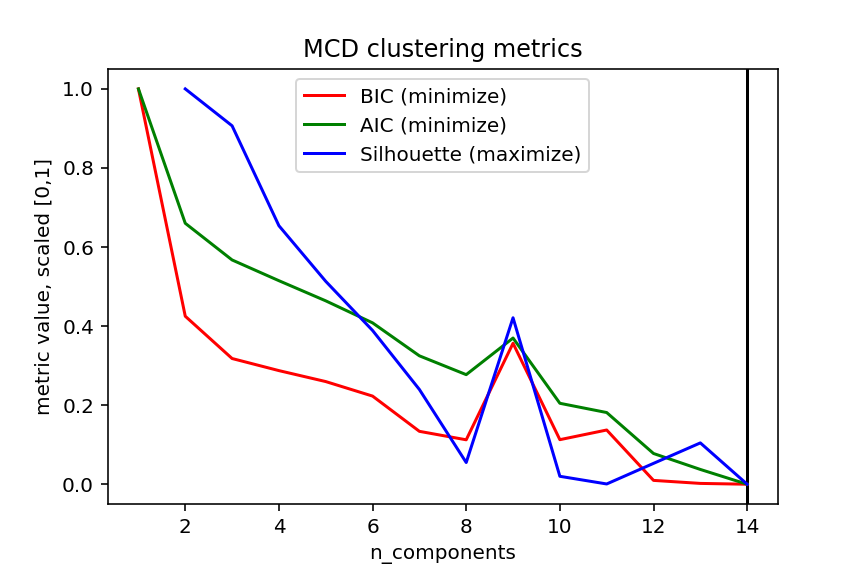

<IPython.core.display.Javascript object>


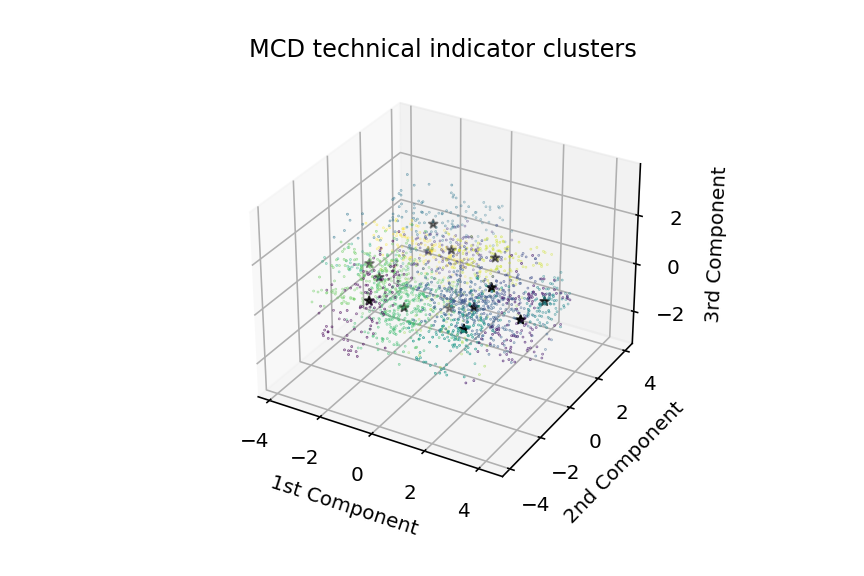

         RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  59.621727  0.717384    0.018884 -3.732389e+08  14.448901  0.997208   
1  59.477918  8.797076    0.020813 -8.926938e+07   5.979358  0.994346   
2  44.862577 -0.491141    0.021141 -2.226092e+08  10.693269  1.003769   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.981389  0.926417  0.511057 -221.314444  0.015377  0.008394  0.046315   
1  0.978652  0.939321  0.200972  -88.596589  0.012013  0.014377  0.043344   
2  1.016843  1.014428  0.362618 -194.600756 -0.009527 -0.008888 -0.028531   

    ROC_100  clusterCoverage  
0  0.154753         0.334280  
1  0.119246         0.355114  
2  0.027650         0.310606  


<IPython.core.display.Javascript object>


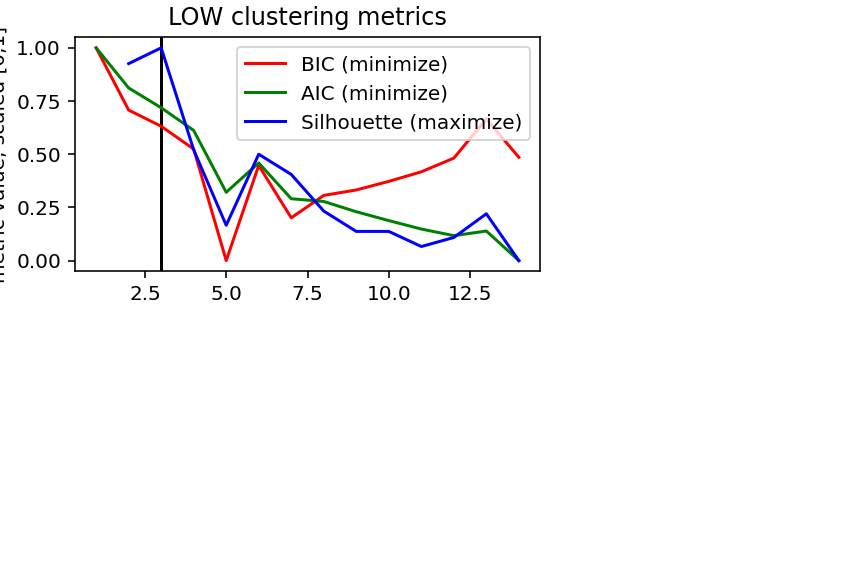

<IPython.core.display.Javascript object>


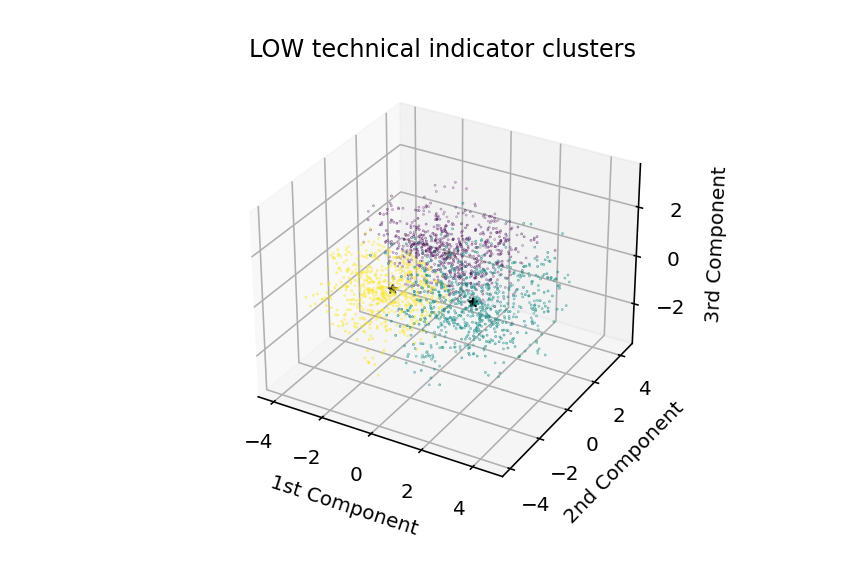

         RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  47.210392  0.271928    0.018117 -4.107321e+08  11.054788  1.000844   
1  58.492278  7.783762    0.018041 -1.707160e+08   5.786852  0.996636   
2  60.827260  0.873409    0.017010 -5.340141e+08  14.143325  0.997122   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.007192  1.009677  0.472606 -206.722006 -0.005173 -0.002259 -0.013634   
1  0.985537  0.941067  0.272373  -98.606807  0.009678  0.008869  0.031291   
2  0.980825  0.925636  0.598731 -232.043939  0.015558  0.008488  0.045875   

    ROC_100  clusterCoverage  
0  0.001898         0.416303  
1  0.130704         0.307618  
2  0.160635         0.276080  


<IPython.core.display.Javascript object>


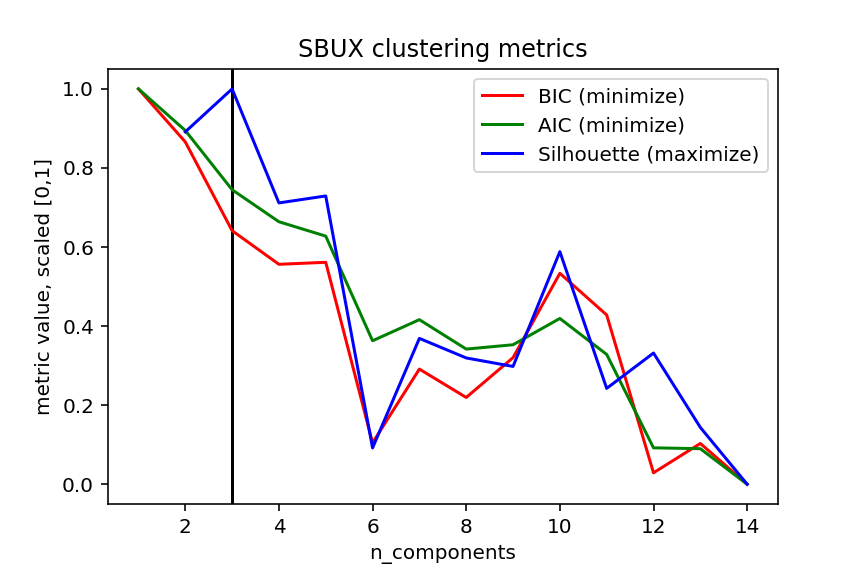

<IPython.core.display.Javascript object>


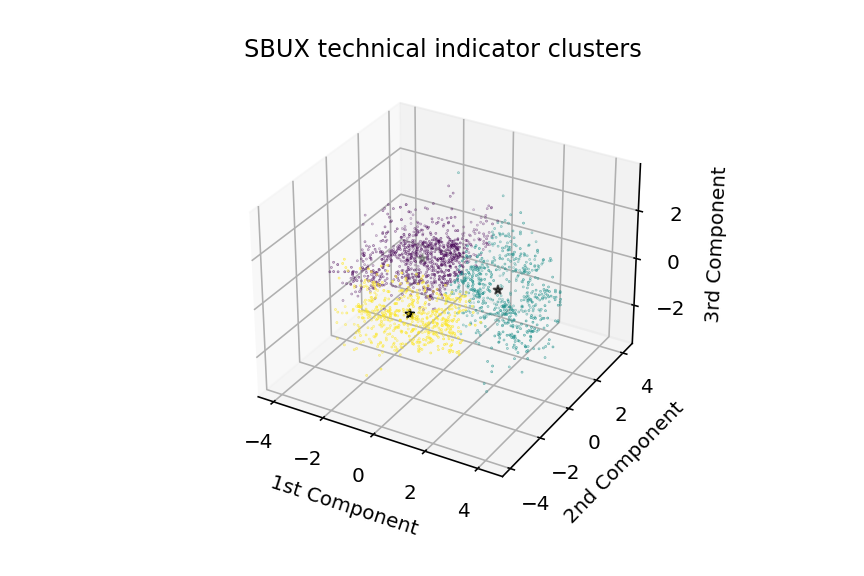

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  61.498527  51.818350    0.026826 -1.119524e+05  3.119355  0.992391   
1  49.754698  49.935016    0.038016 -6.007506e+04  3.815830  0.999898   
2  39.816642  43.600603    0.038615 -4.024043e+06  4.079287  1.014862   
3  60.743623  57.891949    0.038425  5.692015e+06  3.505045  0.986661   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.961114  0.913400  1.397003  -31.679083  0.028561  0.020048  0.090543   
1  1.004318  1.006397  0.771639  -51.227587 -0.004105  0.001590 -0.003643   
2  1.047270  1.078392  0.719703  -76.647911 -0.020243 -0.033192 -0.069213   
3  0.959461  0.897284  0.565555  -25.482982  0.016284  0.034110  0.070413   

    ROC_100  clusterCoverage  
0  0.128725         0.261155  
1  0.059908         0.281496  
2 -0.023453         0.214567  
3  0.234546         0.242782  


<IPython.core.display.Javascript object>


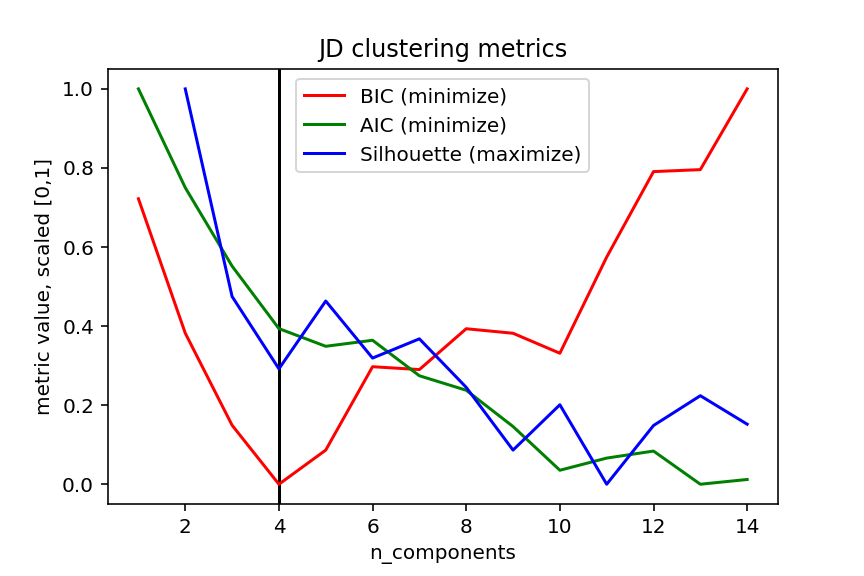

<IPython.core.display.Javascript object>


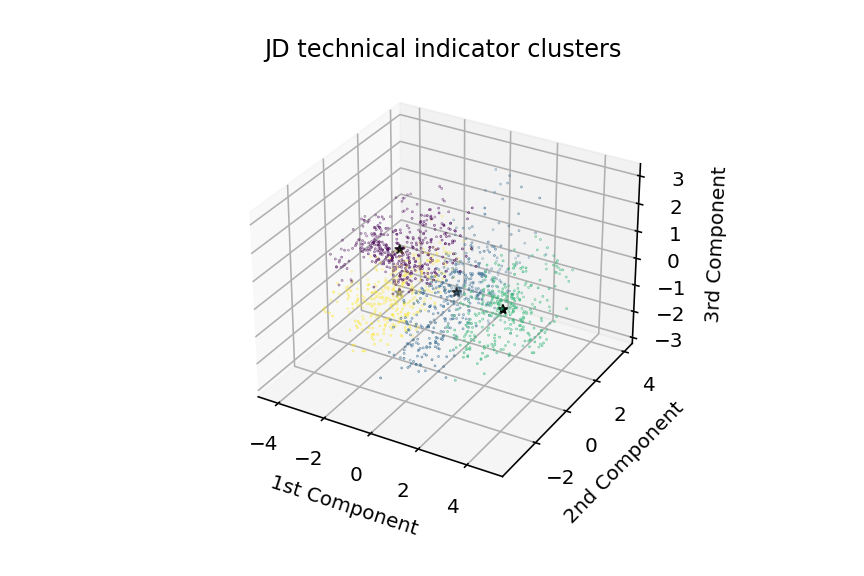

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  54.873098  53.853241    0.045982  1.648748e+06  4.823030  0.984643   
1  41.698433  44.953872    0.050080 -2.338712e+06  5.610007  1.016549   
2  60.647504  49.206298    0.060100 -2.845858e+05  5.688605  0.997664   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.965382  0.995585  0.514461  -34.291195  0.004232  0.039516  0.059297   
1  1.059383  1.104888  0.379310  -72.029010 -0.030381 -0.034894 -0.094001   
2  0.944453  0.699464  0.201783  -40.068053  0.059543  0.015958  0.189830   

    ROC_100  clusterCoverage  
0  0.082765         0.386792  
1  0.083846         0.330189  
2  0.987212         0.283019  


/Users/blake/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


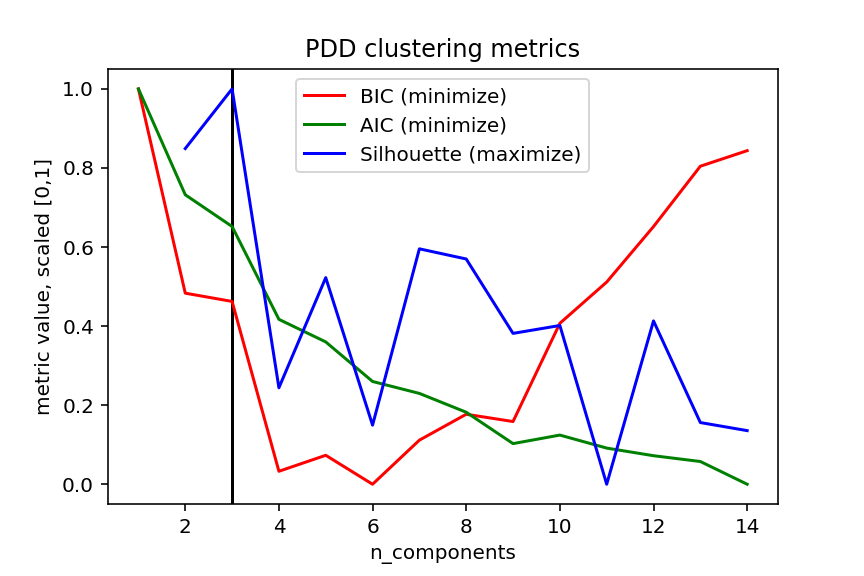

<IPython.core.display.Javascript object>


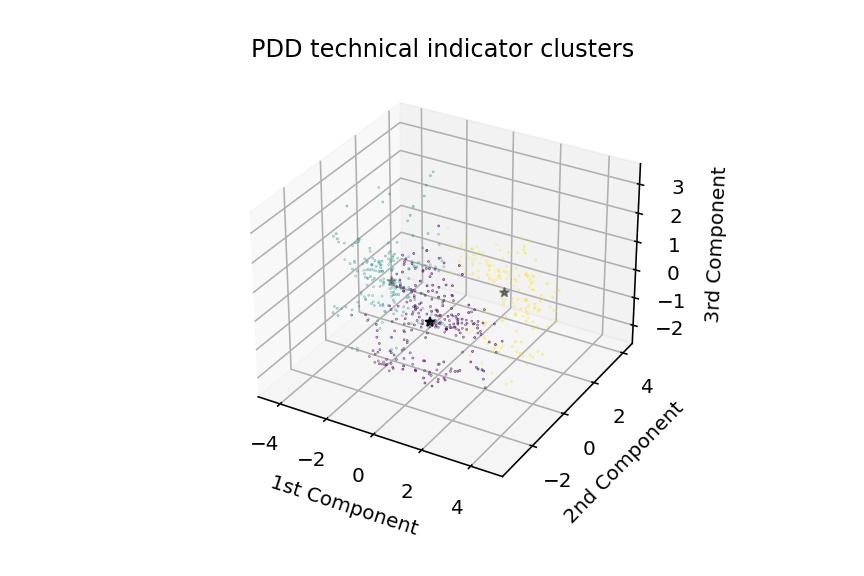

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  52.567418  50.758658    0.022064  -8105.052354  2.122572  0.997900   
1  63.513969  54.597081    0.021862  96110.486004  2.041558  0.998932   
2  52.572506  50.741393    0.023552   1575.573590  2.196195  0.998660   
3  53.352682  52.615957    0.028427  90066.127811  2.436302  0.996864   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.997231  0.979366  0.220969  -42.839996  0.000322  0.004819  0.006211   
1  0.969263  0.891888  0.440747  -31.521779  0.030517  0.007315  0.082530   
2  0.997023  0.974237  0.329514  -44.812840  0.001942  0.003483  0.009040   
3  0.992537  0.965636  0.652833  -44.284683  0.002541  0.008022  0.013320   

    ROC_100  clusterCoverage  
0  0.052655         0.436493  
1  0.223271         0.081517  
2  0.072235         0.385308  
3  0.113490         0.096682  


<IPython.core.display.Javascript object>


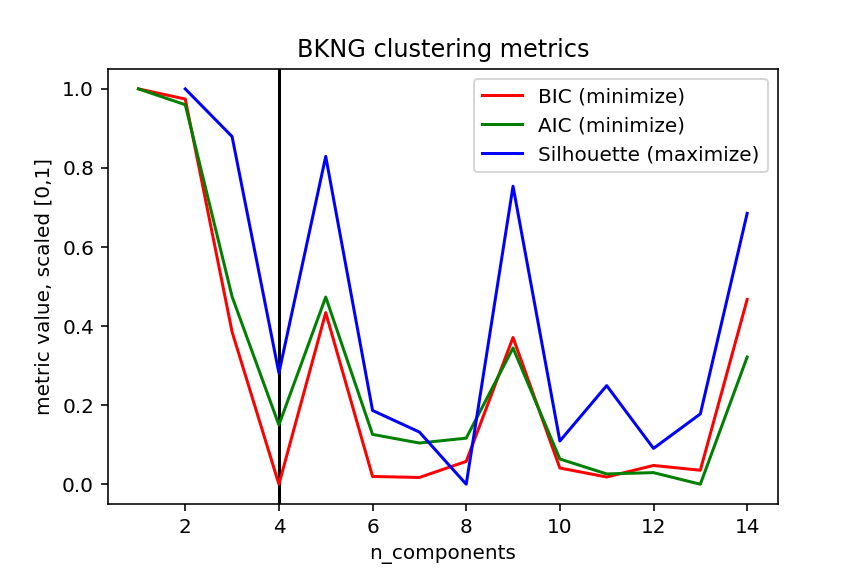

<IPython.core.display.Javascript object>


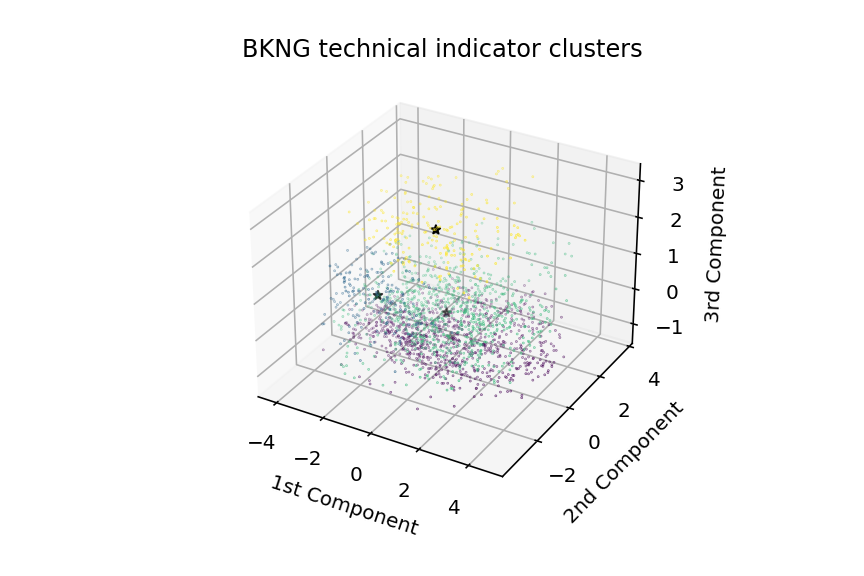

         RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  51.963769  -0.508425    0.023582 -9.974028e+08  24.451919  0.998715   
1  49.757084  13.156315    0.026473 -1.966809e+08   7.762603  1.001290   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.995891  0.983177  0.757464 -276.463558  0.002354  0.004155  0.011875   
1  1.003888  0.993150  0.586751 -103.945360 -0.000917 -0.002058 -0.000134   

    ROC_100  clusterCoverage  
0  0.054446         0.629787  
1  0.050648         0.370213  


<IPython.core.display.Javascript object>


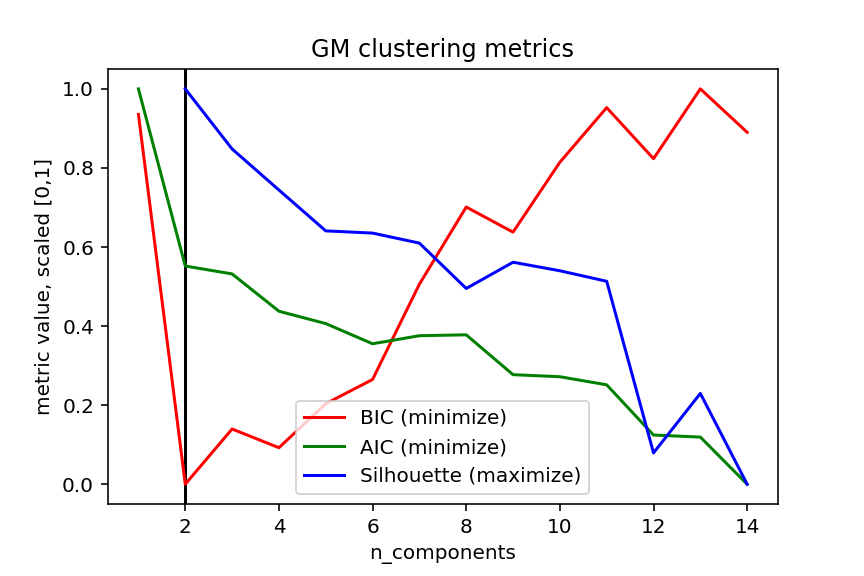

<IPython.core.display.Javascript object>


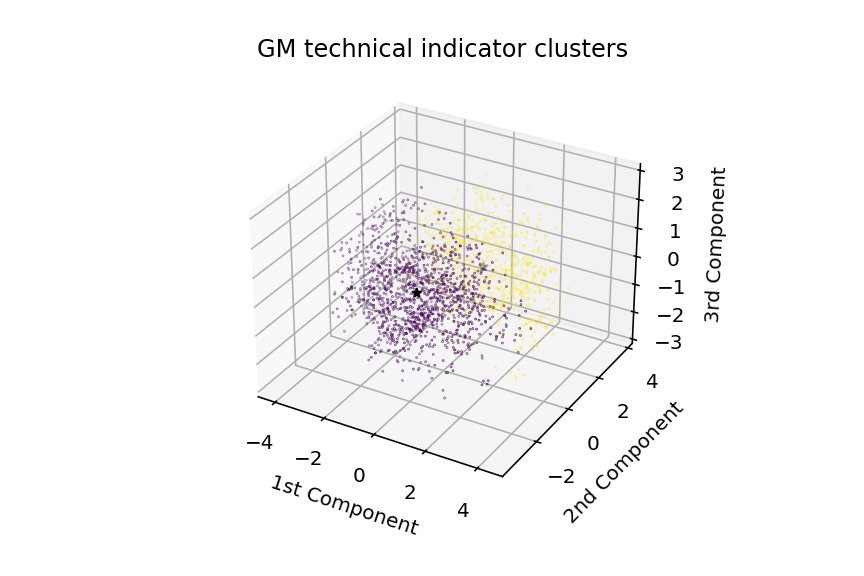

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  65.618758  50.416772    0.030970 -9.929564e+04  3.279374  0.990748   
1  45.452182  17.209768    0.031393 -1.914379e+06  3.928249  1.011181   
2  62.896031  33.948603    0.027654 -1.195260e+06  3.408592  0.991620   
3  50.136560  35.246427    0.037727 -1.035730e+06  4.069053  0.987995   
4  60.915829   4.055268    0.020408 -3.280511e+06  3.583930  0.988259   
5  54.886142  48.743075    0.034908  1.323802e+05  3.495881  1.008632   
6  38.527648  40.613537    0.042963 -1.939907e+05  4.181544  1.014401   
7  60.809812  57.400336    0.038230  2.938972e+05  3.657660  0.981093   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.945468  0.834253  0.233475  -25.155586  0.040269  0.027424  0.131303   
1  1.030379  1.017278  0.659840  -80.122727 -0.009344 -0.024441 -0.036565   
2  0.955763  0.884828  0.537141  -37.635420  0.032297  0.022786  0.106620   
3  0.995698  1.056445  0.495567  -

<IPython.core.display.Javascript object>


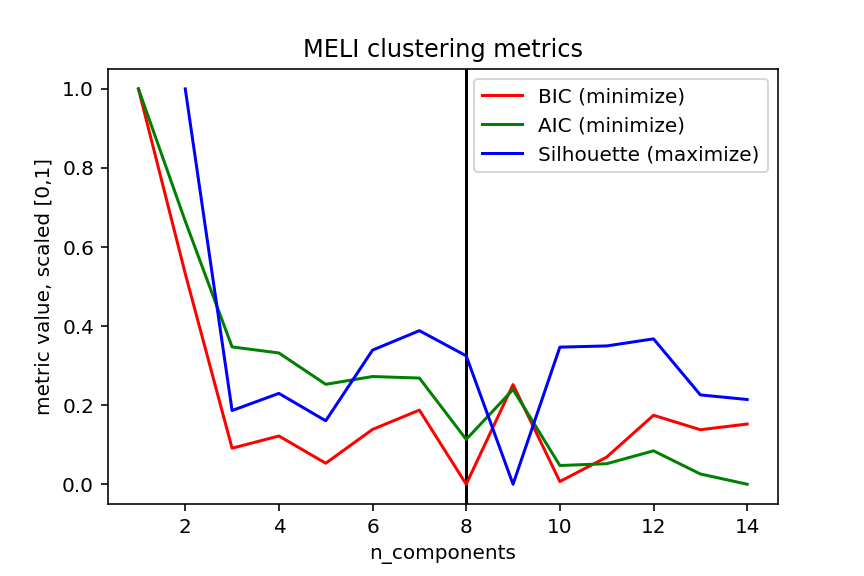

<IPython.core.display.Javascript object>


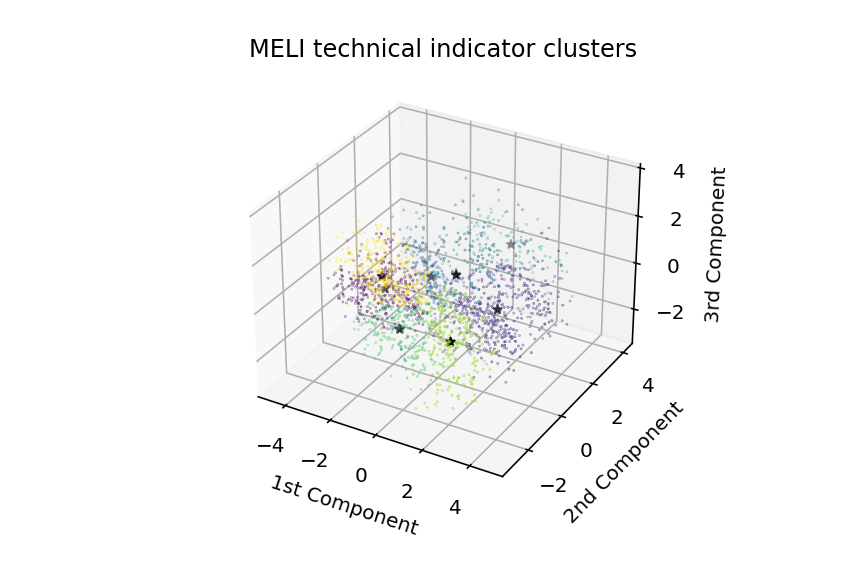

         RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  58.916769  11.712125    0.020839 -5.145495e+07   3.684034  0.992073   
1  44.113357  -1.082739    0.019234 -3.323830e+08  10.389105  1.001548   
2  57.494726   2.477911    0.017041 -2.862472e+08   9.486064  0.996573   
3  58.825777   5.341595    0.017367 -1.383018e+08   6.004375  1.001393   
4  45.953830  10.198736    0.023721 -2.980330e+07   2.946324  0.997349   
5  50.179247   2.552832    0.019015 -2.400305e+08   8.246909  0.999948   
6  50.956716  -5.837524    0.014718 -4.269659e+08  12.972271  1.006278   
7  52.315006   6.014728    0.019093 -4.145963e+07   3.603789  1.007415   
8  62.224952   0.397106    0.015118 -4.052205e+08  12.421304  0.992311   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.980277  0.955432  0.249050  -53.939518  0.007045  0.017783  0.031383   
1  1.013847  1.029931  0.543019 -214.590379 -0.010977 -0.004091 -0.029782   
2  0.986287  0.950758  0.497

<IPython.core.display.Javascript object>


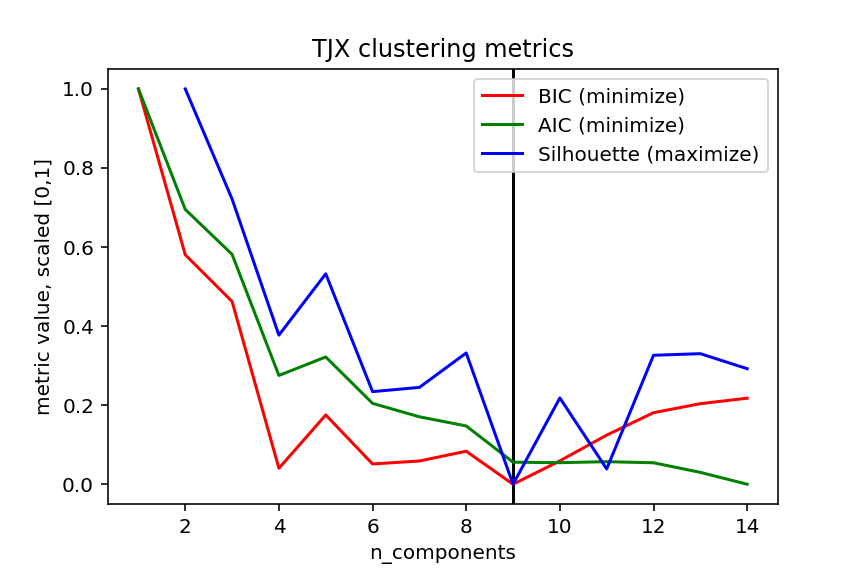

<IPython.core.display.Javascript object>


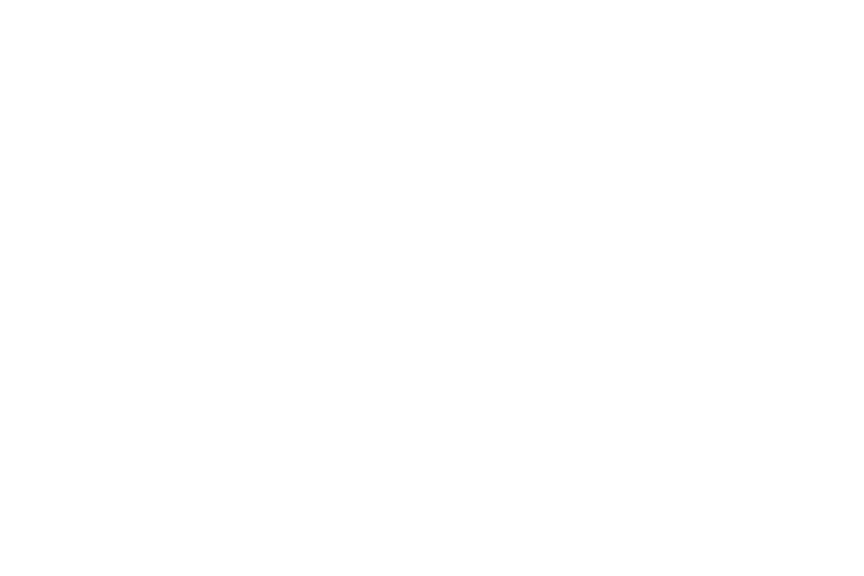

         RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  48.053452  46.899140    0.103930 -1.421775e+06  10.692717  1.018766   
1  58.945426  54.716509    0.073190  4.241939e+07   7.648896  1.015767   
2  44.751961  46.583772    0.046694 -4.591487e+06   5.789507  1.013002   
3  68.758562  60.963811    0.088500  4.798980e+07   7.513191  0.953040   
4  40.757110  43.573990    0.061451 -1.939013e+07   7.287212  1.018704   
5  57.890486  55.181425    0.051622  1.797233e+07   4.783427  0.957380   
6  53.696143  51.283980    0.085452  8.478935e+06   8.334368  0.985951   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.006427  1.103267  5.238562  -62.773923  0.015580 -0.017547  0.126988   
1  0.960973  0.558053 -0.236352  -46.960796  0.083248 -0.016871  0.258423   
2  1.058212  1.087336  0.051877  -60.961086 -0.037037 -0.030615 -0.112134   
3  0.828006  0.701598  2.246515  -13.052220  0.097050  0.128278  0.441142   
4  1.077354  1.262566 

<IPython.core.display.Javascript object>


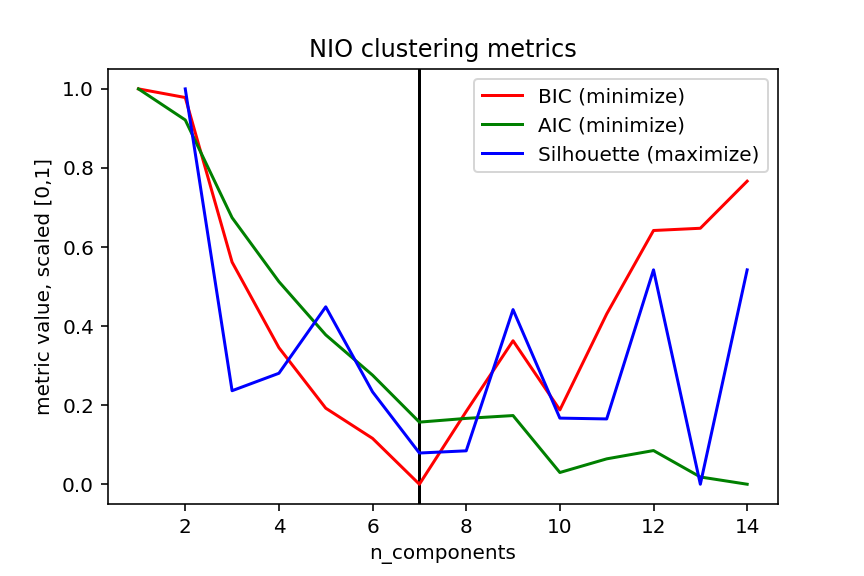

<IPython.core.display.Javascript object>


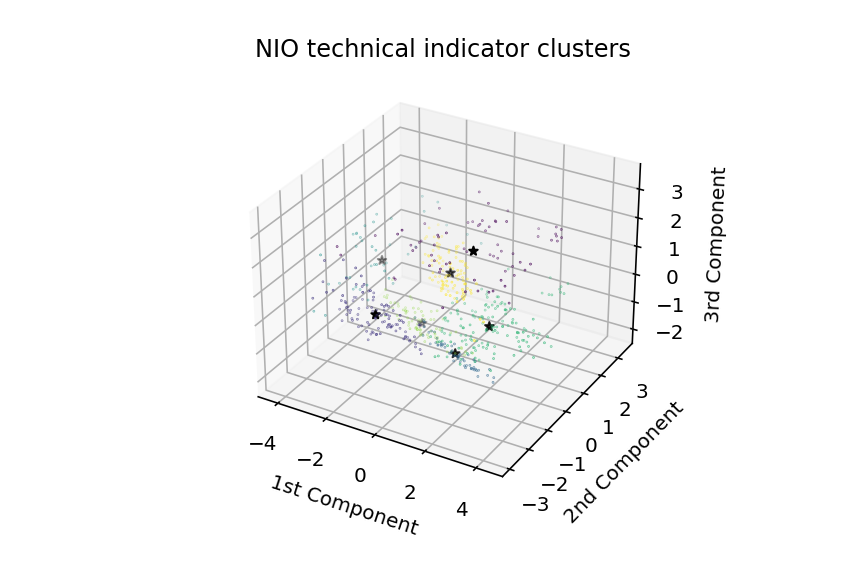

         RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  36.357086  -1.360712    0.023444 -2.726742e+09  27.693036  1.007336   
1  50.735386  15.035959    0.025189 -7.552919e+08   7.839793  0.999067   
2  54.990565   4.241924    0.021713 -2.717857e+09  26.542156  0.994153   
3  51.603234  21.000577    0.026042 -2.907652e+07   0.580007  1.002395   
4  63.334087   0.706203    0.018594 -4.008097e+09  38.213909  0.991971   
5  48.440747  -3.036003    0.020066 -3.933975e+09  38.311676  1.003203   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.037213  1.087643  1.191123 -326.507484 -0.025022 -0.018052 -0.070505   
1  1.000830  0.986605  1.662472  -97.180513 -0.001107  0.002383  0.002690   
2  0.986472  0.981922  1.152249 -298.354683  0.003914  0.013562  0.022367   
3  1.001605  0.959595  1.843473  -26.416216  0.004417 -0.003829  0.011394   
4  0.965173  0.924526  0.800878 -433.636224  0.021337  0.020773  0.068800   
5  1.006247  1.0053

<IPython.core.display.Javascript object>


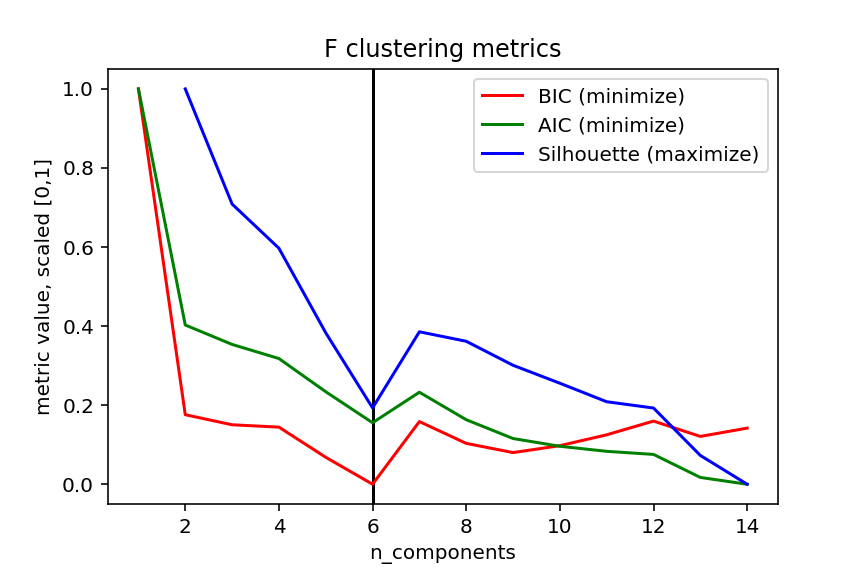

<IPython.core.display.Javascript object>


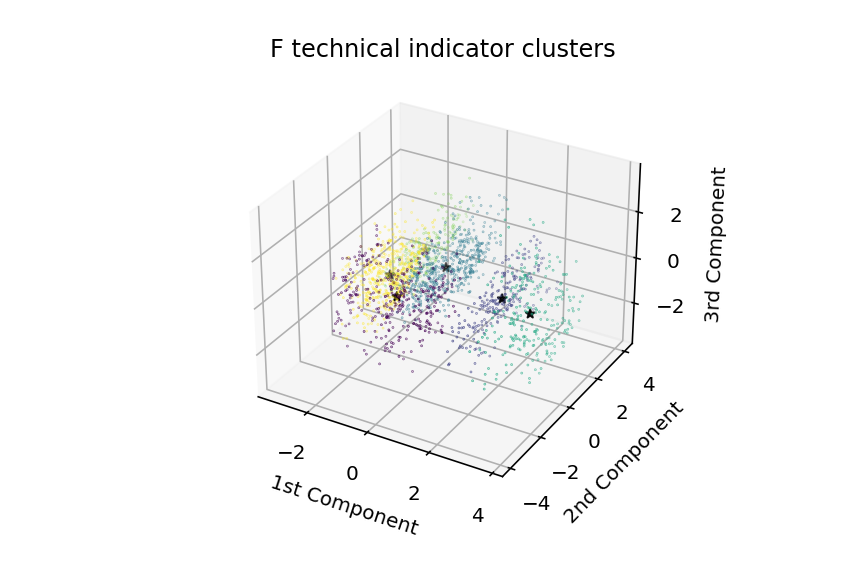

         RSI   Ultimate  BandRadius        Chaikin      NATR     SMA_5  \
0  50.167414  54.073362    0.034342  564251.522052  3.131339  0.989801   
1  55.913802  50.974442    0.025264  115212.105333  2.638765  1.004146   
2  65.405135  59.475981    0.027033  996546.157841  2.731741  0.984133   
3  41.844039  43.532282    0.028675 -610685.670243  2.932300  1.015966   
4  42.072006  46.490707    0.031443 -333418.566631  3.302320  1.003946   
5  65.045527  58.402458    0.026463  919295.117300  2.561337  0.989014   
6  49.743177  49.360970    0.028624  -24631.366511  2.923813  1.003354   
7  57.305072  56.138456    0.029762  648009.325988  3.074989  0.986271   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.999760  0.995237  0.312309  -38.731637 -0.019426  0.022360 -0.030244   
1  0.991241  0.909686  0.652404  -47.019629  0.018434 -0.005811  0.045540   
2  0.946677  0.916652  0.871572  -12.776232  0.025725  0.038633  0.099615   
3  1.038978  1.002607  0.

<IPython.core.display.Javascript object>


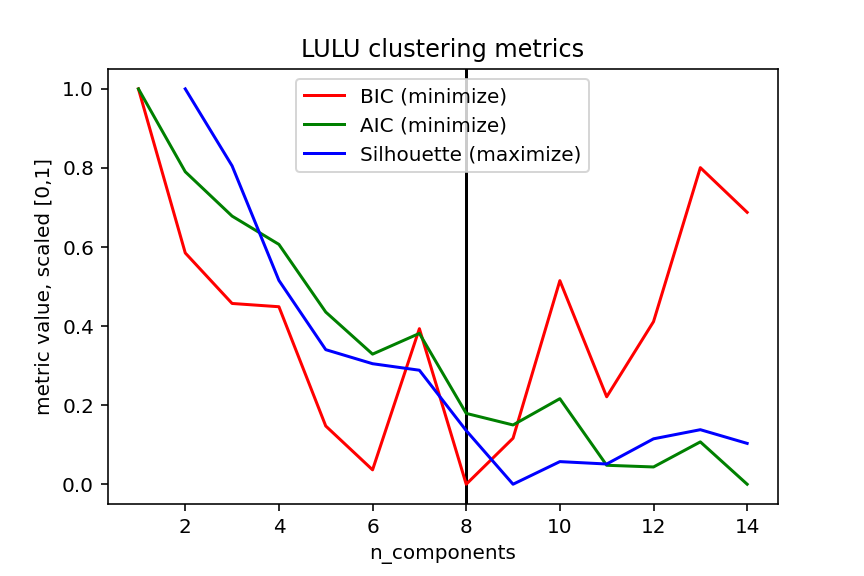

<IPython.core.display.Javascript object>


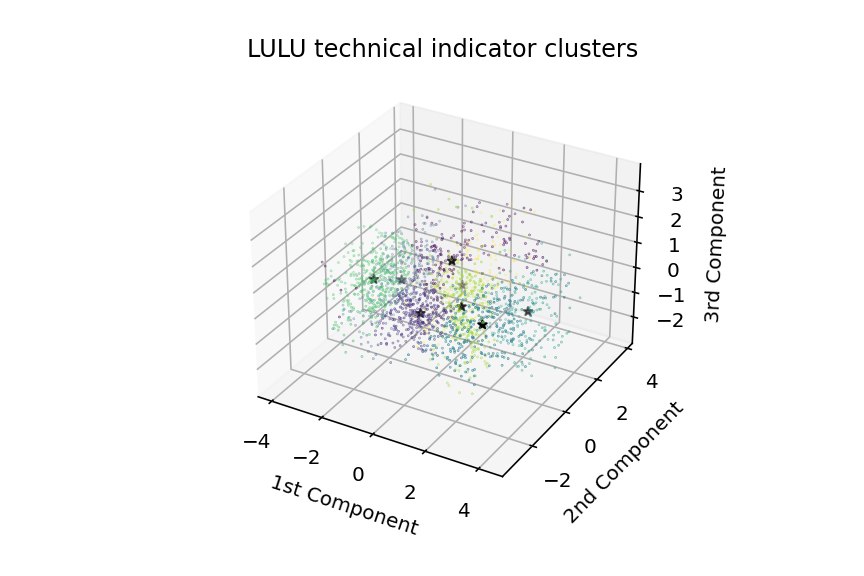

         RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  55.521005  58.779946    0.017485  3.702165e+05  1.475095  0.991420   
1  34.346980  39.968926    0.021494 -9.901883e+04  1.632391  1.010342   
2  44.095590  44.397317    0.018484 -6.289246e+04  1.499096  1.009991   
3  65.715573  63.814786    0.012692  5.313864e+05  1.251032  0.996308   
4  58.883448  53.559411    0.015096  6.515759e+04  1.358184  1.002882   
5  57.254758  40.751739    0.022103 -1.048301e+06  1.713204  0.992913   
6  40.481632  26.515177    0.024106 -1.309701e+06  1.777476  1.011264   
7  43.413134  45.252232    0.022209 -2.091235e+05  1.689768  0.996705   
8  51.764257  51.076533    0.018019  3.940049e+04  1.492992  0.999871   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.983891  1.003319  1.355760  -24.169323 -0.001305  0.019065  0.014005   
1  1.038737  1.079073  1.381097  -87.302429 -0.019705 -0.024437 -0.063987   
2  1.018566  1.010995  1.335249  -72.4

<IPython.core.display.Javascript object>


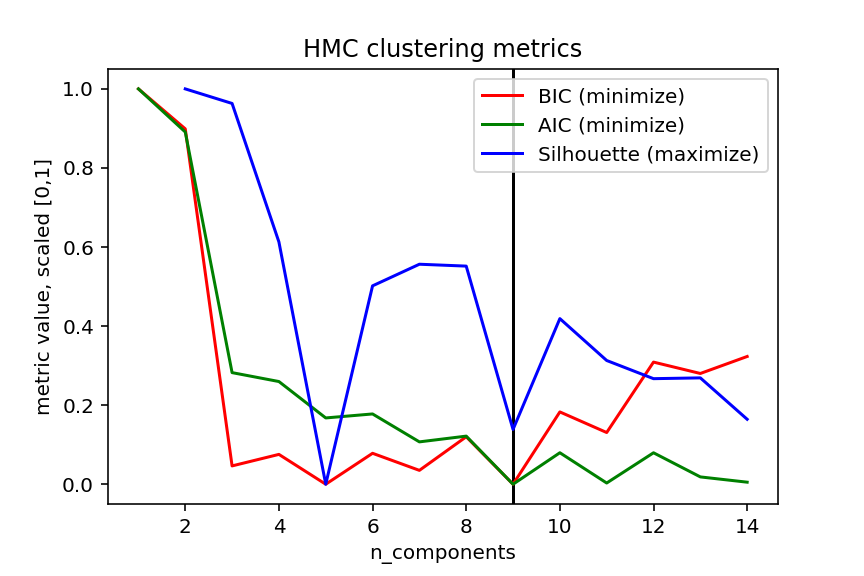

<IPython.core.display.Javascript object>


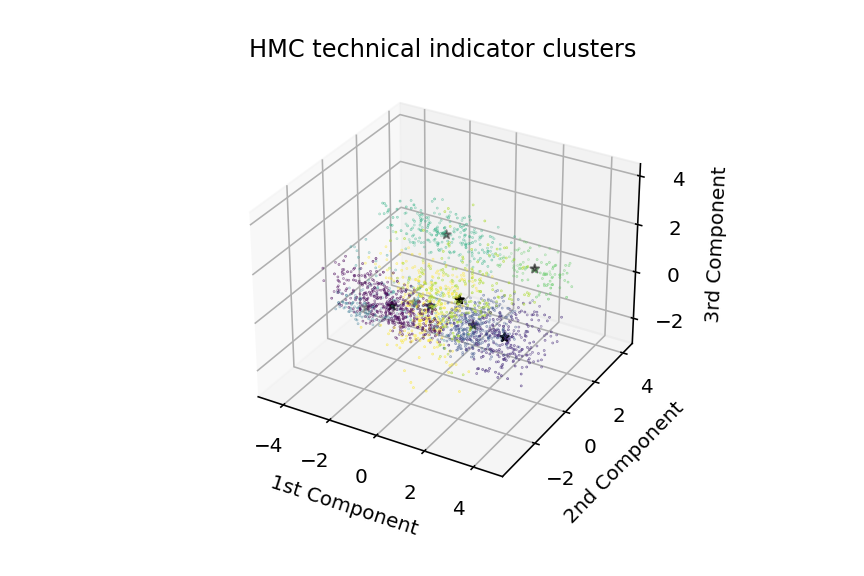

         RSI   Ultimate  BandRadius        Chaikin      NATR     SMA_5  \
0  41.425761  40.996348    0.025278 -341952.163772  2.439509  1.012952   
1  59.113577  51.563288    0.021861   42885.330897  2.447345  1.001794   
2  54.649096  51.401799    0.024051   18927.431035  2.283654  0.998219   
3  65.023183  59.445109    0.023037  303721.630791  2.221318  0.986954   
4  44.098566  49.903304    0.028831   12874.605242  2.806897  0.992413   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.035138  1.007980  0.446701  -77.857127 -0.009784 -0.028418 -0.043202   
1  0.974062  0.959305  1.012174  -38.447569  0.029582  0.001029  0.081439   
2  0.992999  0.934736  0.357295  -43.101560  0.005503  0.005562  0.020257   
3  0.958126  0.892587  0.410254  -15.515463  0.019298  0.031835  0.075153   
4  1.009767  1.110633  0.620582  -47.258425 -0.027041  0.013960 -0.051885   

    ROC_100  clusterCoverage  
0  0.087196         0.225073  
1  0.042814         0.151016  

<IPython.core.display.Javascript object>


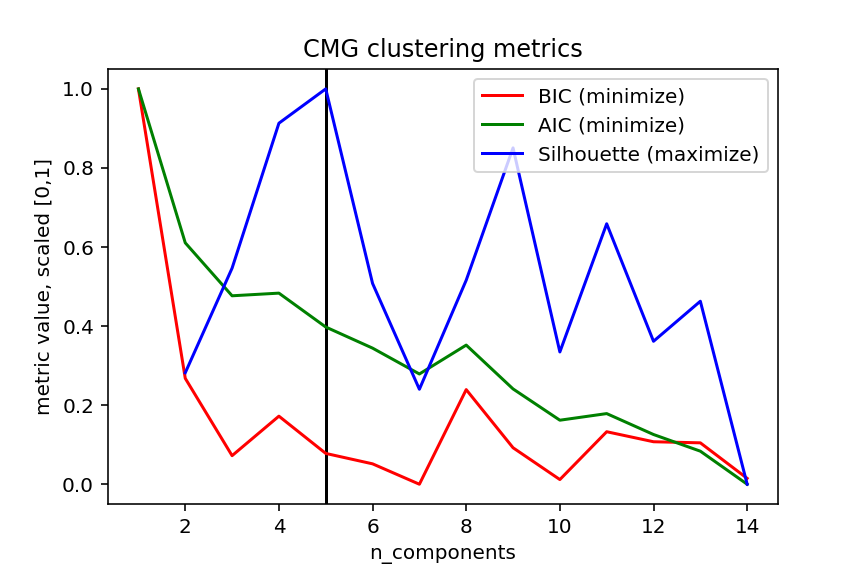

<IPython.core.display.Javascript object>


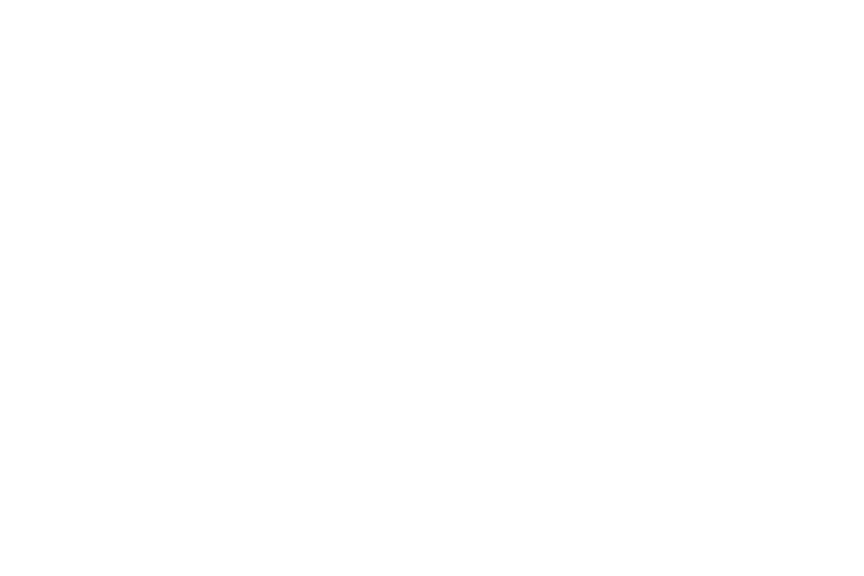

In [57]:
print("Clustering stocks using GMM")
numClusters = np.array([])
for i in range(len(tickers)):

    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)
    
    center = np.mean(X, axis=0)
    
    distToCenter = np.linalg.norm(X-center, axis=1)
    
    q75, q25 = np.percentile(distToCenter, [75 ,25])
    
    iqr = q75 - q25

    nonOutlierIndices = np.argwhere((distToCenter < q75 + 0.5 * iqr) & (distToCenter > q25 - 1 * iqr)).reshape(-1)
    X = X[nonOutlierIndices]

    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    
    
    n_components = np.arange(1, features.shape[1]+1)
    gmms = [GaussianMixture(n_components=k, covariance_type='full').fit(X) for k in n_components]

    
    # calculate metrics
    silhouettes = np.array([metrics.silhouette_score(X, gmms[k-1].predict(X)) for k in n_components[1:]])
    bics = np.array([gmm.bic(X) for gmm in gmms])
    aics = np.array([gmm.aic(X) for gmm in gmms])
    
    minidx = min(np.argmin(bics), np.argmin(aics))
    argmaxSil = np.argmax(silhouettes)
    if argmaxSil > 0 and silhouettes[argmaxSil - 1] < silhouettes[argmaxSil]:
        # enforce local maximum (peak) for silhouette
        minidx = min(minidx, argmaxSil + 1)
        
    numClusters.append(minidx + 1)
    
    centroids = gmms[minidx].means_

    # descale centroids
    centroids_descaled = scaler.inverse_transform(pca.inverse_transform(centroids))

    # create df for centroids
    centroids_df = pd.DataFrame(centroids_descaled, columns=data.columns[6:])
    centroids_df['clusterCoverage'] = [pair[1] / X.shape[0] for pair in np.asarray(np.unique(gmms[minidx].predict(X), return_counts=True)).T]
    print(centroids_df)
    if not os.path.exists("centroids"):
        os.mkdir("centroids")
    centroids_df.to_csv(f'./centroids/{tickers[i]}_centroids.csv')


    # plot the results
    fig = plt.figure()
    plt.title(f"{tickers[i]} clustering metrics")
    plt.axvline(x=minidx + 1, color='black')
    plt.plot(n_components, minmax_scale(bics), label='BIC (minimize)', color='r')
    plt.plot(n_components, minmax_scale(aics), label='AIC (minimize)', color='g')
    plt.plot(n_components[1:], minmax_scale(silhouettes), label='Silhouette (maximize)', color='b')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.ylabel('metric value, scaled [0,1]')

    plt.show()


    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=0.1, c=gmms[minidx].predict(X), cmap='viridis')
    ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black')
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.set_zlabel("3rd Component")
    plt.title(f"{tickers[i]} technical indicator clusters")

    plt.show()

    # plt.plot(n_components[1:], silhouette_avg, label='SC')
    # plt.legend(loc='best')
    # plt.xlabel('n_components')
    # plt.ylabel('Sillhouette Score')
    # plt.show()


number of clusters (raw) [3, 3, 5, 3, 4, 3, 14, 3, 3, 4, 3, 4, 2, 8, 9, 7, 6, 8, 9, 5]
mean: 5.3 , rounds to 5 clusters


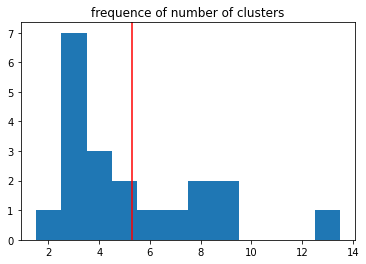

In [69]:
%matplotlib inline

print('number of clusters (raw)', numClusters)
print('mean:', np.mean(numClusters), ', rounds to', int(np.mean(numClusters)), 'clusters')

fig = plt.figure()
plt.hist(numClusters, align='left', bins=np.max(numClusters) - np.min(numClusters))
plt.axvline(x=np.mean(numClusters), c='red')
plt.xlabel="num clusters"
plt.ylabel='freq'
plt.title('frequence of number of clusters')
plt.show()